In [1]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/HabitableWorlds/exoplanets_org_data_jun4_2021.csv
"""

'\n!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/HabitableWorlds/exoplanets_org_data_jun4_2021.csv\n'

# The habitable zone of other worlds in the cosmos

An exoplanet or extrasolar planet is a planet outside the Solar System. The first confirmation of detection occurred in 1992. As of 8 June 2020, there are 3262 confirmed exoplanets, with more than 700 systems having more than one planet. The discovery of exoplanets has intensified interest in the search for extraterrestrial life. There is special interest in planets that orbit in a star's habitable zone, where it is possible for liquid water, a prerequisite for life on Earth, to exist on the surface. The study of planetary habitability also considers a wide range of other factors in determining the suitability of a planet for hosting life. Rogue planets do not orbit any star. Such objects are considered as a separate category of planet. The rogue planets in the Milky Way possibly number in the billions or more.

### Detection techniques

There are many methods of detecting exoplanets. Transit photometry and Doppler spectroscopy have found the most.

<img src="Exoplanets_discovery_methods_chart.png">

__Transit photometry__ is a phenomenon when a celestial body passes directly between a larger body and the observer. __Doppler spectroscopy__ is an indirect method for finding extrasolar planets from radial-velocity measurements via observation of Doppler shifts in the spectrum of the planet's parent star.

<img src="radtrans.png">

The transit probability is

#### $P_\mathrm{Transit}=\frac{R_\mathrm{*}}{A_\mathrm{Planet}(1-E^{2}_\mathrm{Planet})}\,,$

where $R_\mathrm{*}$ is the radius of the host star, $A_\mathrm{Planet}$ the planet semi-major axis, and $E_\mathrm{Planet}$ the planet eccentricity. The depth of the transit is

#### $D_\mathrm{Transit}=\left(\frac{R_\mathrm{planet}}{R_\mathrm{*}}\right)^2\,,$

where $R_\mathrm{planet}$ is the planet radius.

__EX. 1__ In the following, compute the probability and the depth of a transit. The current example is for a Jupiter-like planet orbiting a Sun-like star. Consider different masses for planets and stars. For determining planetary radii from planetary masses use the scaling relation

#### $R_\mathrm{planet}=(M_\mathrm{planet}/\mathrm{M_{\bigoplus}})^{0.485}\ R_{\bigoplus}\,,$

where $\mathrm{M_{\bigoplus}}$ and $\mathrm{R_{\bigoplus}}$ are the Earth's mass and radius. Use the scaling relation

#### $R_*=\begin{cases}
1.06\ {\rm R}_\odot\ (M_*/{\rm M}_\odot)^{0.945}& \text{$ M_*< 1.66\ \mathrm{M}_{\odot}$}\\
1.33\ {\rm R}_\odot\ (M_*/{\rm M}_\odot)^{0.555}& \text{$ M_*> 1.66\ \mathrm{M}_{\odot}$}
\end{cases}\,,$

for determining stellar radii from stellar masses. Tip: remember to convert the units.

In [2]:
M_earth = 5.972e27 # g
R_earth = 6.371e8 # cm
M_jupiter = 1.898e30 # g
M_sun = 1.989e33 # g
R_sun = 6.957e10 # cm
au = 1.496e+13 # au

M_planet = 1.*M_jupiter
M_star = 1*M_sun
A_planet = 5.*au
E_planet = 0.048775

R_planet = (M_planet / M_earth)**0.485 * R_earth

if M_star < 1.66*M_sun:
    R_star = 1.06*R_sun * (M_star / M_sun)**0.945
else:
    R_star = 1.33*R_sun * (M_star / M_sun)**0.555

Ptransit = R_star / (A_planet * (1 - E_planet**2))
Dtransit = (R_planet / R_star)**2

print("Transit probability:", Ptransit)
print("Depth of transit:", Dtransit)

Transit probability: 0.000988236040896909
Depth of transit: 0.01995586648788283


The shift in velocity due to the gravitational pull of the exoplanet is

#### $K=\sqrt{\frac{G}{A_\mathrm{Planet}(1-E^{2}_\mathrm{Planet})}} \frac{M_\mathrm{planet}\sin I}{M_\mathrm{*}^{1/2}}\,,$

where $G$ is the gravitational constant, $M_\mathrm{*}$ the mass of the host star, $M_\mathrm{planet}$ the mass of the planet, and $I$ the inclination of the system with respect to the observer.

__EX. 2__ In the following, compute the shift in velocity. The current example is for a Jupiter-like planet orbiting a Sun-like star. Consider different masses for planets and stars, using the scaling relations previously discussed. Tip: remember to convert the units.

In [3]:
import numpy

G = 6.6725985e-8
kms = 1e3

M_planet = 1.*M_jupiter
M_star = 1*M_sun
A_planet = 5.*au
E_planet = 0.048775
I = 90.*numpy.pi/180

K = numpy.sqrt(G / (A_planet * (1 - E_planet**2))) * M_planet * numpy.sin(I) / M_star**0.5 / kms

print(K)

1.2726023569197475


__EX. 3__ Now, go to https://ssd.jpl.nasa.gov/?planet_phys_par and repeat the calculations for all the planets in our Solar System. Which has the largest probability for transits and/or radial velocity? Assume in the calculations $E_\mathrm{planet}=0$ and $I=90$ deg.

In [4]:
planet = ["Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto"]
Mplanet=[0.330114e27,4.86747e27,5.97237e27,0.641712e27,1898.187e27,568.3174e27,86.8127e27,102.4126e27,0.013030e27] # use lists
Aplanet=[0.3871,0.7233,1.000,1.5273,5.2028,9.5388,19.1914,30.0611,39.5294] # use lists

E_planet = 0
I = 90 * numpy.pi/180

M_star = 1*M_sun

if M_star < 1.66*M_sun:
    R_star = 1.06*R_sun * (M_star / M_sun)**0.945
else:
    R_star = 1.33*R_sun * (M_star / M_sun)**0.555

# use a loop to compute and print the results for each planet

print("{0:10s}   {1:10s}   {2:10s}   {3:15s}".format("Planet","P_transit","D_transit","Velocity (km/s)"))
print("-"*55)
for index in range(len(planet)):
    R_planet = (Mplanet[index] / M_earth)**0.485 * R_earth
    
    Ptransit = R_star / (Aplanet[index]*au * (1 - E_planet**2))
    Dtransit = (R_planet / R_star)**2
    K = numpy.sqrt(G / (Aplanet[index]*au * (1 - E_planet**2))) * Mplanet[index] * numpy.sin(I) / M_star**0.5 / kms
    
    print("{0:10s}   {1:10.8f}   {2:10.8f}   {3:15.13f}".format(planet[index], Ptransit, Dtransit, K))

Planet       P_transit    D_transit    Velocity (km/s)
-------------------------------------------------------
Mercury      0.01273424   0.00000450   0.0007945416460
Venus        0.00681519   0.00006121   0.0085705434177
Earth        0.00492943   0.00007464   0.0089435721254
Mars         0.00322754   0.00000858   0.0007775750075
Jupiter      0.00094746   0.01995777   1.2461913642241
Saturn       0.00051678   0.00619550   0.2755550596590
Uranus       0.00025686   0.00100126   0.0296752402273
Neptune      0.00016398   0.00117535   0.0279714684231
Pluto        0.00012470   0.00000020   0.0000031034776


### The habitable zone

The circumstellar habitable zone, or simply the habitable zone, is the range of orbits around a star within which a planetary surface can support liquid water given sufficient atmospheric pressure.

<img src="habitable_zone.png">


The size and location of the habitable zone depends on the host star luminosity: the more luminous the host star, the further the habitable zone. The luminosity of a star is connected to its mass

#### $\frac{L}{L_\odot}=\left(\frac{M}{M_\odot}\right)^{3.5}\,,$

where $L_\odot$ and $M_\odot$ are the Sun's luminosity and mass, respectively.

The distance at which there is a given temperature due to the star's luminosity is

#### $r=\left(\frac{L}{4\pi\sigma T^4}\right)^{1/2}\,,$

where $\pi=3.1415$, $\sigma=3.31\times 10^{-12}$ L$_\odot$ AU$^{-2}$ K$^{-4}$ is the Stefen-Boltzmann constant, and $T$ is the temperature.

__EX. 4__ Assuming that water boils at $373$ K and freezes at $273$ K, compute the habitable zone for our solar system.


In [5]:
sigma = 3.31e-12
pi = 3.1415926

M = 1. # units = M_sun

L = M**3.5

T_boil = 373.
T_freeze = 273.

r_in = numpy.sqrt(L / (4*pi*sigma*T_boil**4))
r_out = numpy.sqrt(L / (4*pi*sigma*T_freeze**4))

print("Habitable zone from:", r_in, "au to ", r_out, "au")

Habitable zone from: 1.1144572432314201 au to  2.080442804727613 au


The calculation of the expected temperature of a planet involves a couple of subtleties. One is __albedo__, which is the degree to which a planet or moon reflects light without absorbing it. Earth reflects about $37\%$ of light, whereas the Moon reflects only $12\%$. More reflection leads to a colder planet. Another issue is the __greenhouse effect__. If radiation is trapped then the planet heats up beyond the temperature it would normally acquire. An obvious example is that of Venus. Finally, the temperature can vary substantially over the surface of a planet, as it is obvious from a comparison between Death Valley and Antarctica. Atmospheres smooth out the difference (compare the Earth with the airless Moon, where the mean daytime temperature is $380$ K and the mean nighttime temperature is $120$ K). Therefore, a planet such as Earth can have both "habitable" and "uninhabitable" spots on it simultaneously.

__EX. 5__ Repeat __EX. 4__ for different substances. For example, you can find melting and boiling temperatures for some substances here https://www.engineeringtoolbox.com/melting-boiling-temperatures-d_390.html . Feel free to look for more.

In [6]:
import numpy

data = ["Aluminum",932,94.5,2740,2500,"Bismuth",544,12.5,1193,190,"Bromine",266,16,333,43,"Copper",1359,32.0,1460,1210,"Ethyl Alcohol",159,24.9,351,205,"Gold",1336,15.4,2933,377,"Hydrogen",13.8,14.0,20.3,108,"Iron",1808,69.1,3023,1520,"Lead",600,5.9,2023,208,"Lithium",459,160,1609,511,"Mercury",234,2.7,630,70.0,"Nitrogen",63.3,6.1,77.3,48.0,"Oxygen",54.4,3.3,90.2,50.9,"Sulfuric acid",282,39,599,122,"Water",273.15,79.7,373.15,539,"Zinc",693,24,1191,475]

Substance = [data[i] for i in range(0,len(data),5)]
Tmelt=[data[i] for i in range(1,len(data),5)] # use lists for different material
Tboil=[data[i] for i in range(3,len(data),5)]

for index in range(len(Substance)):
    r_in = numpy.sqrt(L / (4*pi*sigma*Tboil[index]**4))
    r_out = numpy.sqrt(L / (4*pi*sigma*Tmelt[index]**4))

    print("Habitable zone for", Substance[index]," from:", r_in, "au to ", r_out, "au")

Habitable zone for Aluminum  from: 0.020652848019812493 au to  0.17850453336949507 au
Habitable zone for Bismuth  from: 0.1089432149915751 au to  0.5239420746159449 au
Habitable zone for Bromine  from: 1.398275047962776 au to  2.191380544314889 au
Habitable zone for Copper  from: 0.07274034612194796 au to  0.0839541485312504 au
Habitable zone for Ethyl Alcohol  from: 1.2585394744648524 au to  6.133195751494967 au
Habitable zone for Gold  from: 0.018024239472267185 au to  0.08686966736075619 au
Habitable zone for Hydrogen  from: 376.26082116417354 au to  814.1846344966616 au
Habitable zone for Iron  from: 0.016966989084736095 au to  0.04743339637058754 au
Habitable zone for Lead  from: 0.03788692072641251 au to  0.4307036716487341 au
Habitable zone for Lithium  from: 0.059892023539724025 au to  0.7359625300503808 au
Habitable zone for Mercury  from: 0.39066092666551844 au to  2.8317138175459178 au
Habitable zone for Nitrogen  from: 25.94908729008036 au to  38.696675424966564 au
Habitabl

__EX. 6__ Repeat __EX. 4__ and __EX. 5__ for different stellar masses, using the scaling relations provided above.

In [7]:
import numpy

M = 0.2 # units = M_sun

L = M**3.5

data = ["Aluminum",932,94.5,2740,2500,"Bismuth",544,12.5,1193,190,"Bromine",266,16,333,43,"Copper",1359,32.0,1460,1210,"Ethyl Alcohol",159,24.9,351,205,"Gold",1336,15.4,2933,377,"Hydrogen",13.8,14.0,20.3,108,"Iron",1808,69.1,3023,1520,"Lead",600,5.9,2023,208,"Lithium",459,160,1609,511,"Mercury",234,2.7,630,70.0,"Nitrogen",63.3,6.1,77.3,48.0,"Oxygen",54.4,3.3,90.2,50.9,"Sulfuric acid",282,39,599,122,"Water",273.15,79.7,373.15,539,"Zinc",693,24,1191,475]

Substance = [data[i] for i in range(0,len(data),5)]
Tmelt=[data[i] for i in range(1,len(data),5)] # use lists for different material
Tboil=[data[i] for i in range(3,len(data),5)]

for index in range(len(Substance)):
    r_in = numpy.sqrt(L / (4*pi*sigma*Tboil[index]**4))
    r_out = numpy.sqrt(L / (4*pi*sigma*Tmelt[index]**4))

    print("Habitable zone for", Substance[index]," from:", r_in, "au to ", r_out, "au")

Habitable zone for Aluminum  from: 0.0012353284446069484 au to  0.010677061456661486 au
Habitable zone for Bismuth  from: 0.00651632415039893 au to  0.031339045708298846 au
Habitable zone for Bromine  from: 0.08363635555132724 au to  0.13107512904532656 au
Habitable zone for Copper  from: 0.004350887516762585 au to  0.005021629347386825 au
Habitable zone for Ethyl Alcohol  from: 0.0752782187703925 au to  0.3668506716795667 au
Habitable zone for Gold  from: 0.0010781009810917662 au to  0.005196018048519984 au
Habitable zone for Hydrogen  from: 22.505646413965703 au to  48.69960003534512 au
Habitable zone for Iron  from: 0.001014862657954155 au to  0.002837178858077646 au
Habitable zone for Lead  from: 0.0022661664292986383 au to  0.025762088418697572 au
Habitable zone for Lithium  from: 0.003582378576199959 au to  0.04402082689341291 au
Habitable zone for Mercury  from: 0.023366973622401428 au to  0.16937599223338312 au
Habitable zone for Nitrogen  from: 1.5521174421209896 au to  2.3146

### Exoplanets catalogs

As of 8 June 2020, there are 3262 confirmed exoplanets! About $1$ in $5$ Sun-like stars have an "Earth-sized" planet in the habitable zone. Assuming there are $200$ billion stars in the Milky Way, it can be hypothesized that there are $11$ billion potentially habitable Earth-sized planets in the Milky Way. Almost all of the planets detected so far are within the Milky Way. The nearest exoplanet is Proxima Centauri b, located $4.2$ light-years ($2.6\times 10^5$ AU) from Earth and orbiting Proxima Centauri, the closest star to the Sun.

There are various sources where to find a list of known and confirmed exoplantes, but probably the most complete and updated is __exoplanets.org__. Go to http://exoplanets.org/ .


<img src="exoplanets_org.png">

Selecting __Plots__, you can access a user-friendly interface where you can plot the measured characteristics of the exoplantes that have been found so far. You can also download the plots you produce and the relative data.


<img src="plots.png">

For example, I am plotting here the mass of the detected exoplanets versus their orbital semi-major axis. Tip: when plotting, it could be necessary to use the log-scale on one or both the axis.


<img src="mass-sma.png">

__EX. 7__ Produce 3 different plots, in http://exoplanets.org/ . Download them for your personal reference.

__EX. 8__ Look at a data tables for known exoplanets and repeat __EX. 1__, __EX. 2__, __EX. 4__, __EX. 5__ for some of them. Tip: create a file to read, and use a loop.


![alt text](table.png "Title")

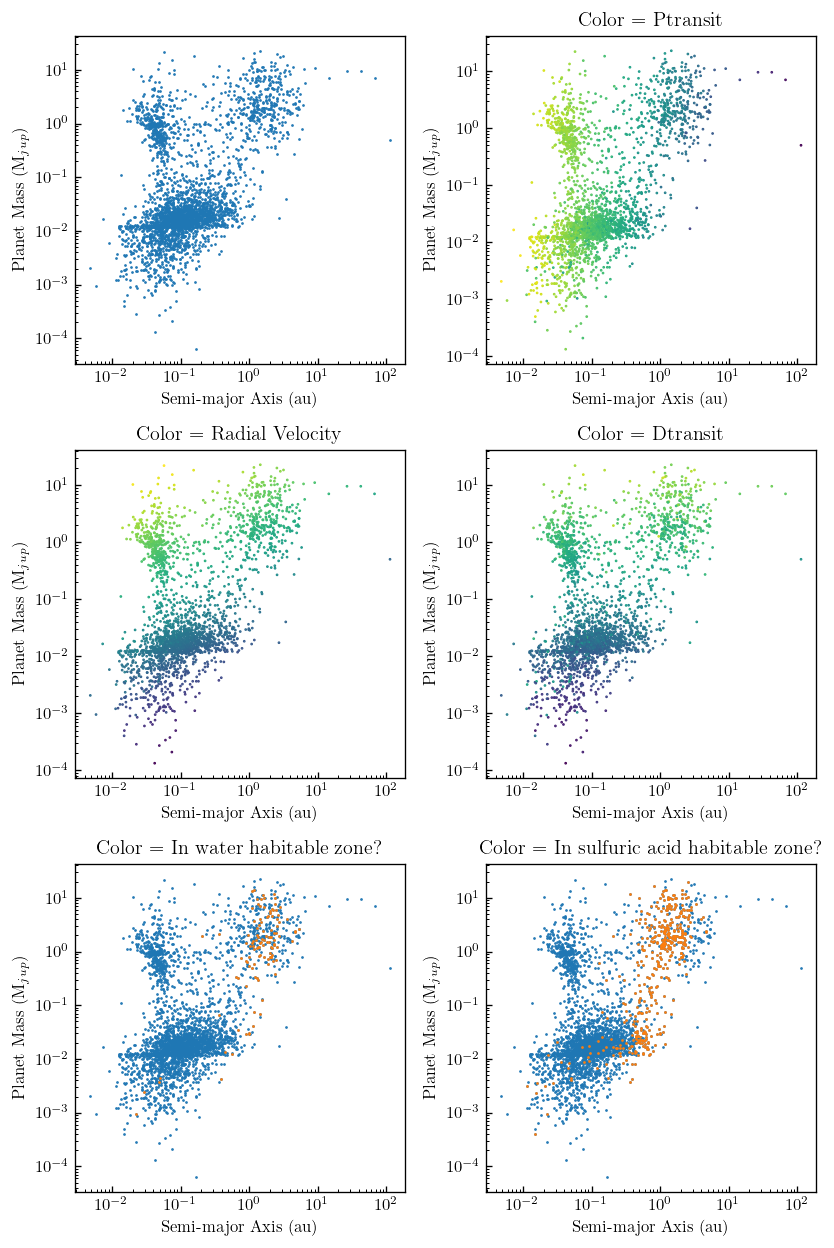

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import numpy as np
import pandas

# create table

data = pandas.read_csv("exoplanets_org_data_jun4_2021.csv", skiprows=[1])

bad = np.logical_or(data["MASS"] == 0, data["A"] == 0)

data = data.drop(numpy.where(bad)[0])

# loop and print results

### EX. 1

E_planet = 0.

data["R_planet"] = (data["MASS"]*M_jupiter / M_earth)**0.485 * R_earth
data["R_star"] = np.where(data["MSTAR"] < 1.66, 1.06*R_sun * data["MSTAR"]**0.945, 
                         1.33*R_sun * data["MSTAR"]**0.555)

data["Ptransit"] = data["R_star"] / (data["A"]*au * (1 - E_planet**2))
data["Dtransit"] = (data["R_planet"] / data["R_star"])**2

### EX. 2

data["K"] = numpy.sqrt(G / (data["A"]*au * (1 - E_planet**2))) * data["MASS"]*M_jupiter * numpy.sin(I) / (data["MSTAR"]*M_sun)**0.5 / kms

### EX. 5

data["L"] = data["MSTAR"]**3.5

for index in range(len(Substance)):
    data["rin_"+Substance[index]] = numpy.sqrt(data["L"] / (4*pi*sigma*Tboil[index]**4))
    data["rout_"+Substance[index]] = numpy.sqrt(data["L"] / (4*pi*sigma*Tmelt[index]**4))

# plot results

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7,10.5), dpi=120)

# Basic
axes[0,0].scatter(data["A"], data["MASS"], s=0.4)

# Colorized by Ptransit
axes[0,1].scatter(data["A"], data["MASS"], s=0.4, c=numpy.log10(data["Ptransit"]))
axes[0,1].set_title("Color = Ptransit")

# Colorized by Dtransit
axes[1,1].scatter(data["A"], data["MASS"], s=0.4, c=numpy.log10(data["Dtransit"]))
axes[1,1].set_title("Color = Dtransit")

# Colorized by K
axes[1,0].scatter(data["A"], data["MASS"], s=0.4, c=numpy.log10(data["K"]))
axes[1,0].set_title("Color = Radial Velocity")

# Colorized by whether they are in the water habitable zone

good = numpy.logical_and(data["rin_Water"] < data["A"], data["A"] < data["rout_Water"])

axes[2,0].scatter(data["A"], data["MASS"], s=0.4)
axes[2,0].scatter(data["A"][good], data["MASS"][good], s=0.4)

axes[2,0].set_title("Color = In water habitable zone?")

# Colorized by whether they are in the sulfuric acid habitable zone

good_sa = numpy.logical_and(data["rin_Sulfuric acid"] < data["A"], data["A"] < data["rout_Sulfuric acid"])

axes[2,1].scatter(data["A"], data["MASS"], s=0.4)
axes[2,1].scatter(data["A"][good_sa], data["MASS"][good_sa], s=0.4)

axes[2,1].set_title("Color = In sulfuric acid habitable zone?")

for ax in axes.flatten():
    ax.set_xlabel("Semi-major Axis (au)")
    ax.set_ylabel("Planet Mass (M$_{jup}$)")

    ax.set_xscale('log')
    ax.set_yscale('log')
    
fig.tight_layout()

Giordano Bruno, who was an Italian philosopher, was burnt alive for suggesting that there are many other worlds out there (https://en.wikipedia.org/wiki/Giordano_Bruno). Nowadays, we know for sure there is plenty of exoplanets in the Universe. The question whether they can host and sustain life has enormous social, ethical, and religious implications. From a purely scientific point of view, we can only estimate how many exoplanets can host life, as we know it.

#### 1) How many of the currently known exoplanets are in the habitable zone?

In [9]:
print(good.sum())

116


#### 2) Are there particular planetary properties that tend to be in the habitable zone? 

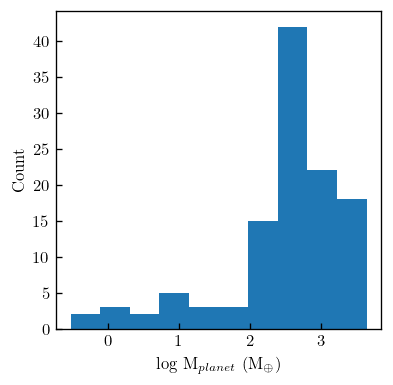

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.hist(numpy.log10(data["MASS"][good]*M_jupiter/M_earth))

ax.set_xlabel("$\log$ M$_{planet}$ (M$_{\oplus}$)")
ax.set_ylabel("Count")

plt.show()

Imagine now that water or oxygen are not necessary to sustain life for some living beings. You can find some simple explanation here https://biologydictionary.net/anaerobic-organism/.

#### 3) Which kind of metabolisms can be sustained without oxygen?

Those dependent on sulfuric acid.

#### 4) Which exoplanets could sustain the growth of anaerobic organisms?

426


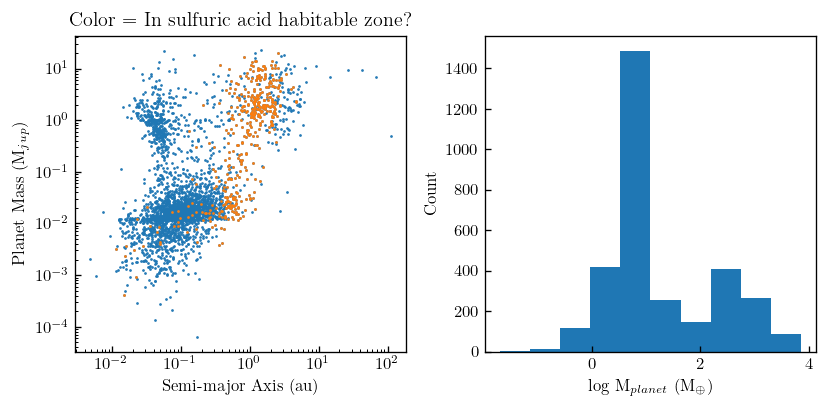

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5), dpi=120)

# Colorized by whether they are in the sulfuric acid habitable zone

good_sa = numpy.logical_and(data["rin_Sulfuric acid"] < data["A"], data["A"] < data["rout_Sulfuric acid"])

print(good_sa.sum())

axes[0].scatter(data["A"], data["MASS"], s=0.4)
axes[0].scatter(data["A"][good_sa], data["MASS"][good_sa], s=0.4)

axes[0].set_title("Color = In sulfuric acid habitable zone?")

axes[0].set_xlabel("Semi-major Axis (au)")
axes[0].set_ylabel("Planet Mass (M$_{jup}$)")

axes[0].set_xscale('log')
axes[0].set_yscale('log')

axes[1].hist(numpy.log10(data["MASS"]*M_jupiter/M_earth))

axes[1].set_xlabel("$\log$ M$_{planet}$ (M$_{\oplus}$)")
axes[1].set_ylabel("Count")
    
fig.tight_layout()